<a href="https://colab.research.google.com/github/i-am-batman-28/Data-Sci/blob/main/Deep_learning_network_for_Banking_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'banking-dataset-marketing-targets:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F223954%2F1570881%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240528%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240528T074647Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4ec1d20760a54a847a6e4f04b778c61cee6dc375a041b788742a24675a221d3a02dfbc36e41918a3ce6e080bfb129207f65c52fa0dae4d837a3067f1dc0e06be5e067544e0fbf4dd5622388dbf07578e7ff95d25959b7c6feecfd63ba6a45e3f61377023fab7bcd75a36d3eec9660a641295b5a40555f9f406645668bfce8148b8b0a0c20647632b89507030be1268f67ff2bbdfee9637de912080a98658fedb87be9f5cd2176ea2dbca5fc21db2b4fe78d1c4db7a6fe066eb88e7ca872bebc5fc0981ef9a15b8c196ab9c9dcf85720ecc2fed3cfba43f67fb18d09689ccf0064155d00de7120e4f9afc88573f013b2f45ff85e4384dd9c87961155e1863ae65'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 590269 bytes downloaded
Downloaded and uncompressed: banking-dataset-marketing-targets
Data source import complete.


In [ ]:
!pip3 install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#from google.colab import files

#files.upload()

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
!ls -lha kaggle.json



ls: cannot access 'kaggle.json': No such file or directory


In [ ]:
!pip install -q kaggle



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!pwd



/content


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list



ref                                                    title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                    1MB  2024-04-10 09:48:38          25099        533  1.0              
mayankanand2701/zomato-stock-price-dataset             Zomato Stock Price Dataset 📊🍗🏨🍴               13KB  2024-05-23 06:42:34            969         25  1.0              
sahirmaharajj/school-student-daily-attendance          School Student Daily Attendance                2MB  2024-04-29 19:29:56           7005        143  1.0              
zeesolver/spotfy                                       Spotify Songs Album                           47KB  2024-05-10 09:21:57           168

In [ ]:

import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/banking-dataset-marketing-targets/test.csv
/kaggle/input/banking-dataset-marketing-targets/train.csv


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', sep=";", on_bad_lines='skip')
train_df.head()

<ipython-input-10-7e2a7927b54d>:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', sep=";", on_bad_lines='skip')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1.0,0.0,unknown,no


deep learning network to predict the marketing campaign

In [ ]:
train_df.shape

(55459, 17)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv',sep=";")
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
test_df.shape

(4521, 17)

### y - has the client subscribed a term deposit?
chenge the y name by **"deposit"**

In [ ]:
train_df.rename(columns={'y': 'deposit'}, inplace=True)
test_df.rename(columns={'y': 'deposit'}, inplace=True)


# Data Exploration

In [ ]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55459 entries, 0 to 55458
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        55459 non-null  int64  
 1   job        55459 non-null  object 
 2   marital    55459 non-null  object 
 3   education  55459 non-null  object 
 4   default    55459 non-null  object 
 5   balance    55459 non-null  object 
 6   housing    55459 non-null  object 
 7   loan       55459 non-null  object 
 8   contact    55459 non-null  object 
 9   day        55459 non-null  int64  
 10  month      55459 non-null  object 
 11  duration   55459 non-null  object 
 12  campaign   55458 non-null  float64
 13  pdays      55458 non-null  float64
 14  previous   55458 non-null  float64
 15  poutcome   55458 non-null  object 
 16  deposit    55458 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 7.2+ MB


In [ ]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     1
pdays        1
previous     1
poutcome     1
deposit      1
dtype: int64

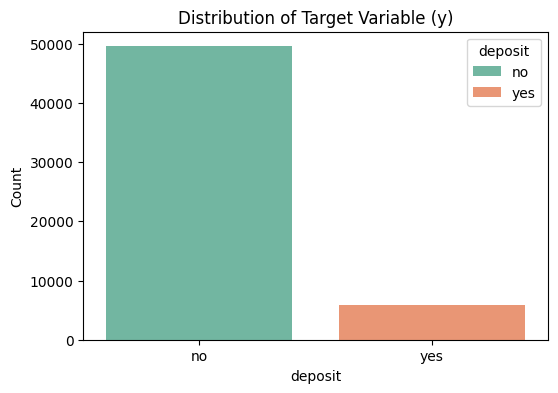

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', hue='deposit', data=train_df, palette='Set2')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('deposit')
plt.ylabel('Count')
plt.show()

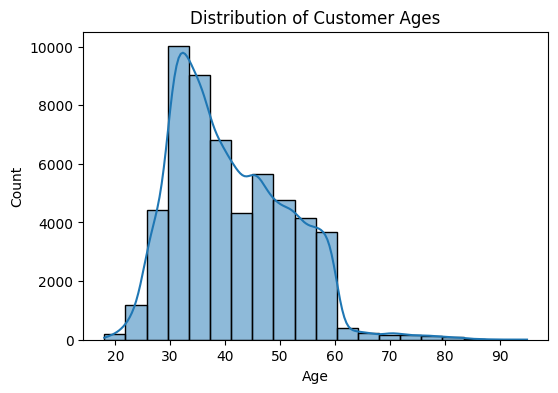

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x='age', bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### The histogram indicates a higher frequency of customers falling within the age range of 30 to 40 years old. This concentration suggests a significant portion of the customer base lies within this demographic segment, potentially indicating a key target audience or a notable trend within the dataset.

<ipython-input-32-61f4844cff72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=train_df, palette='Set2')


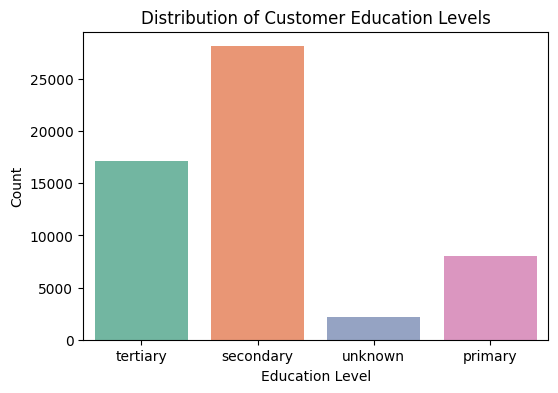

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=train_df, palette='Set2')
plt.title('Distribution of Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

##### The Education level plot presents a snapshot of customers' educational backgrounds using a bar plot. It simplifies the data by categorizing customers based on their education level attainment, such as secondary, tertiary, and primary. Notably, the visualization indicates significant concentrations within certain education brackets: over 5000 customers have a secondary education, while more than 3500 have attained tertiary education. Conversely, the count of customers with a primary education level is depicted as under 2000. These insights offer valuable guidance for tailoring marketing strategies, product development, and customer support services to cater effectively to diverse educational demographics.

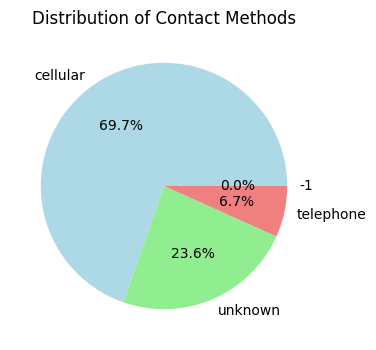

In [ ]:
plt.figure(figsize=(6, 4))
train_df['contact'].value_counts().plot(
    kind='pie', autopct='%1.1f%%',
    colors=['lightblue', 'lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Distribution of Contact Methods')
plt.ylabel('')
plt.show()

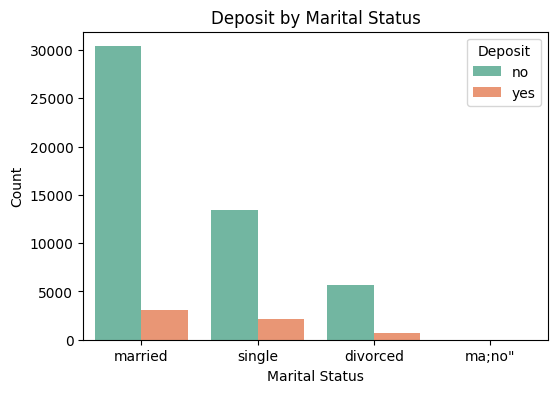

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='deposit', data=train_df, palette='Set2')
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

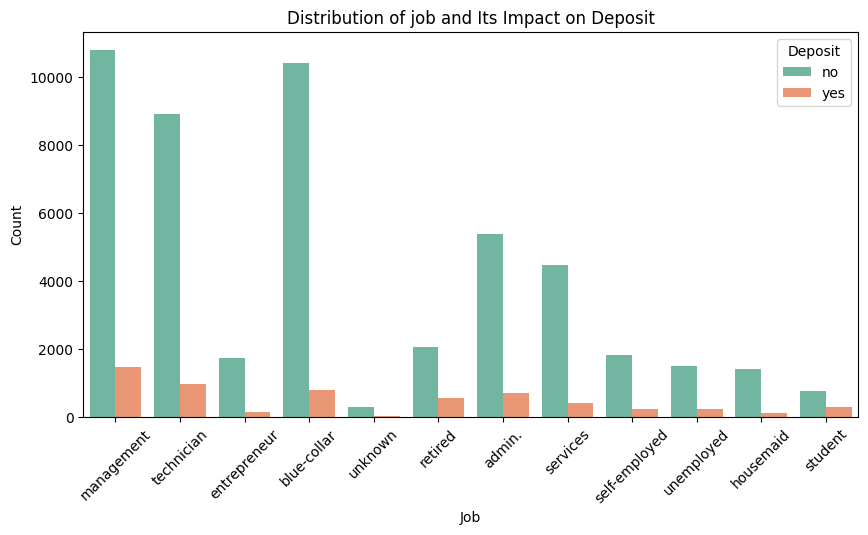

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df['job'], data=train_df, palette='Set2', hue='deposit')
plt.title(f"Distribution of job and Its Impact on Deposit")
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.xticks(rotation=45)
plt.show()

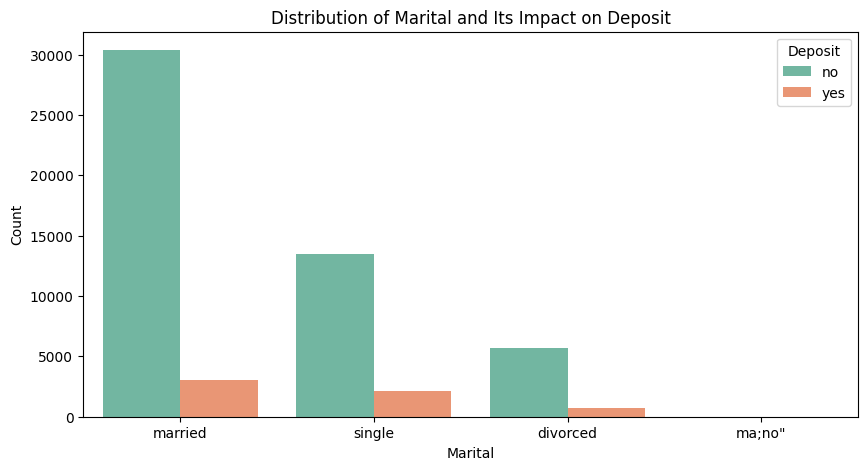

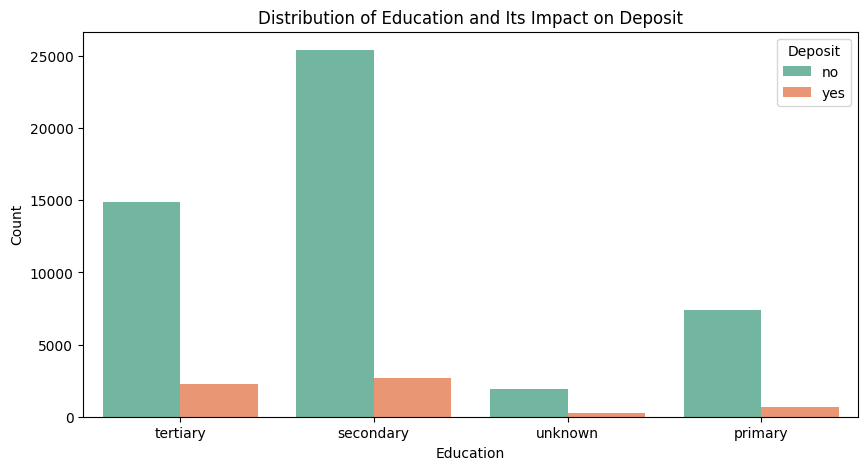

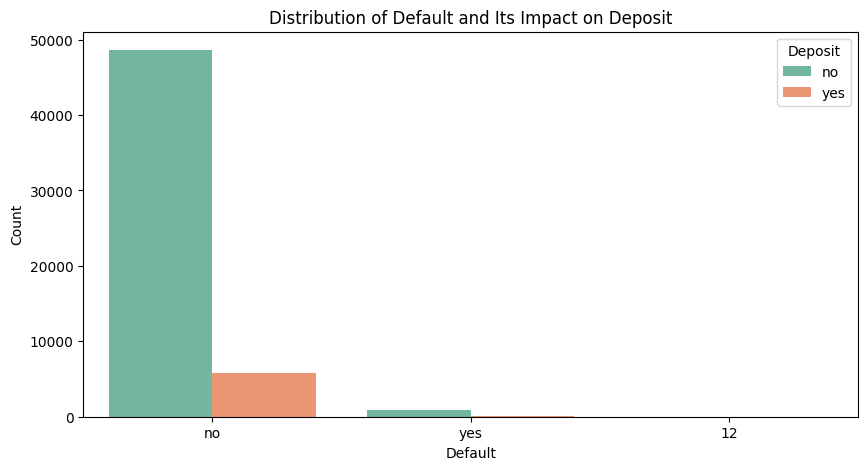

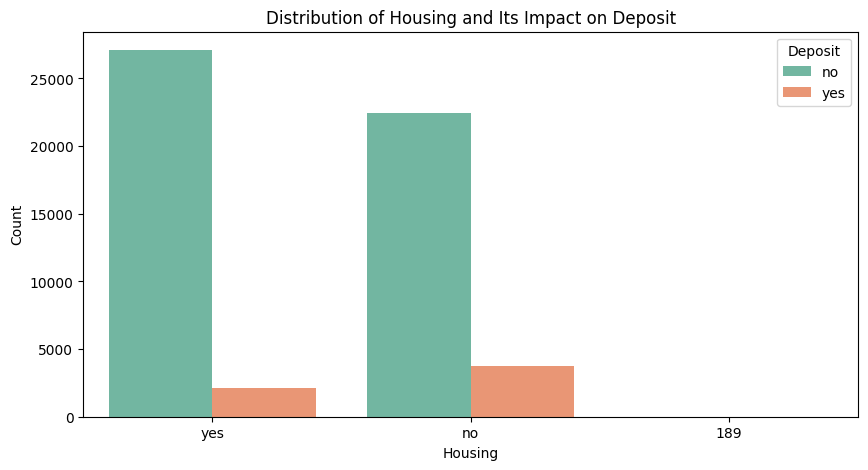

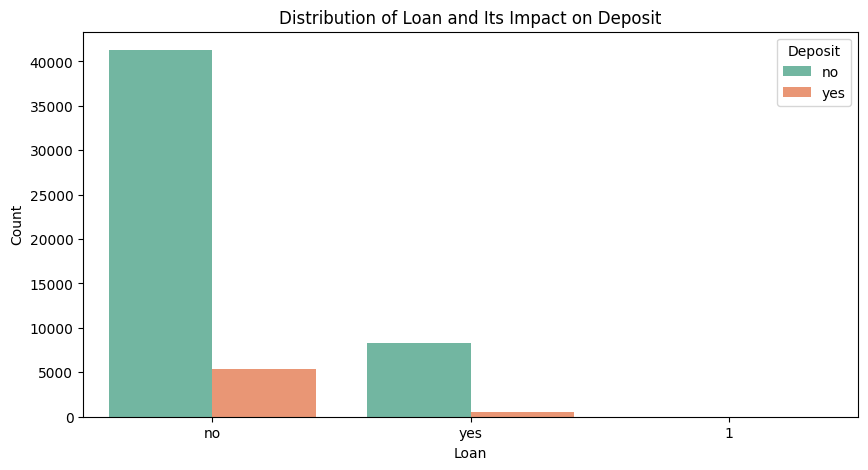

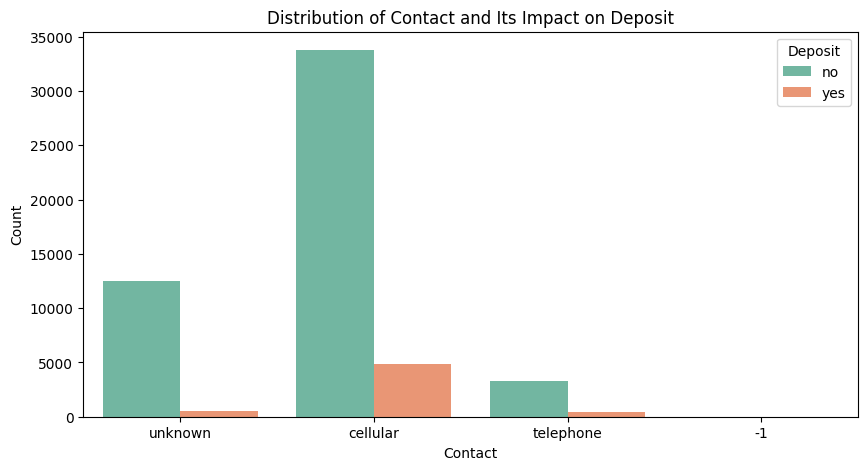

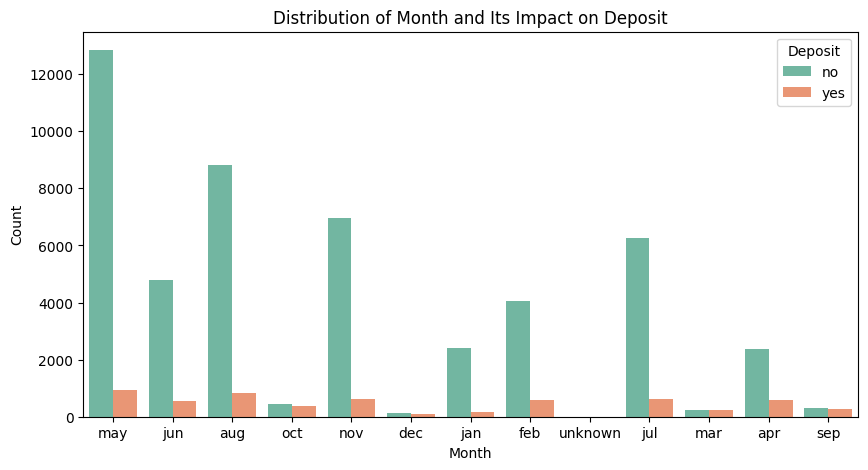

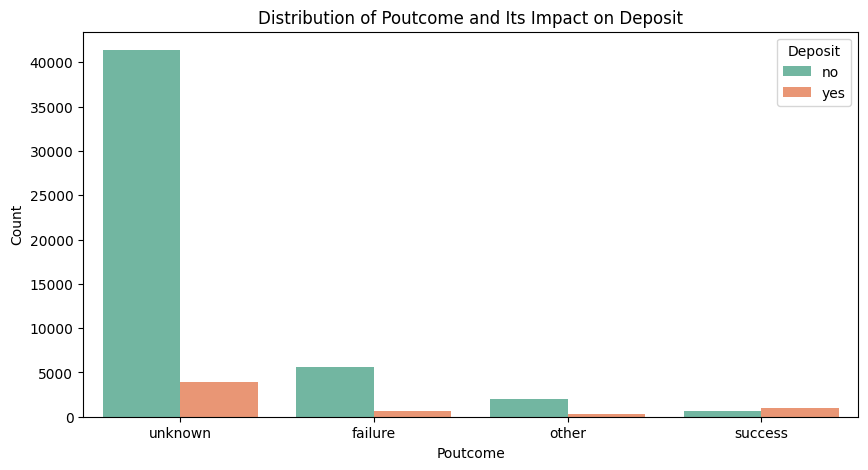

In [ ]:
features_to_explore = ['marital', 'education', 'default',  'housing',
       'loan', 'contact', 'month',  'poutcome']

for feature in features_to_explore:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=train_df, palette='Set2', hue='deposit')
    plt.title(f'Distribution of {feature.capitalize()} and Its Impact on Deposit')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Deposit', loc='upper right')
    plt.show()

#### Identify any patterns, outliers, or correlation between features and the target variable.


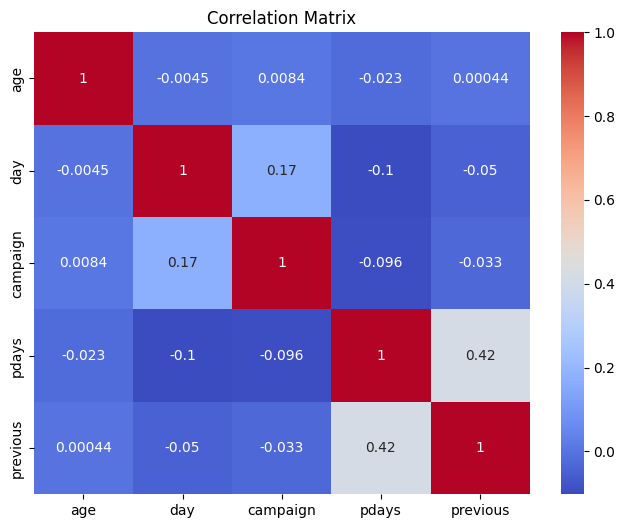

In [ ]:
correlation_matrix = train_df.select_dtypes(exclude="object").corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

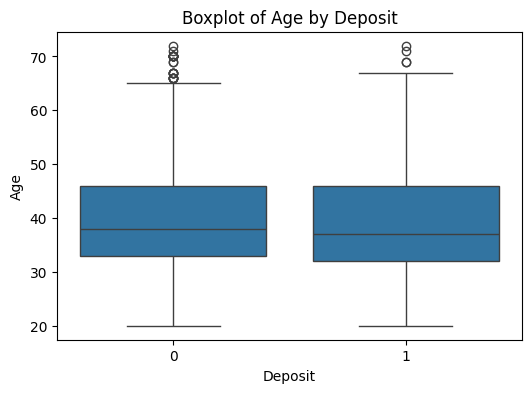

TypeError: 'value' must be an instance of str or bytes, not a int

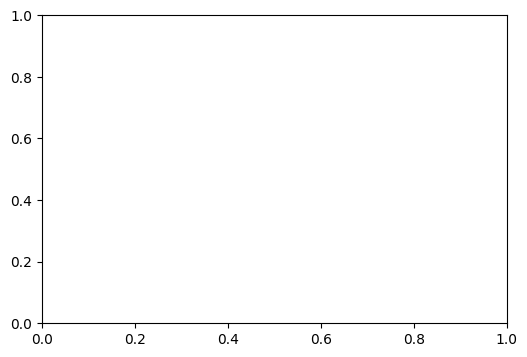

In [ ]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Convert 'deposit' column to string
train_df['deposit'] = train_df['deposit'].astype(str)

# Plot boxplot for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='deposit', y=feature, data=train_df)
    plt.title(f'Boxplot of {feature.capitalize()} by Deposit')
    plt.xlabel('Deposit')
    plt.ylabel(feature.capitalize())
    plt.show()




# Data Preprocessing

In [ ]:
categorial_to_onehot = ['job','marital','contact','poutcome']
categorial_to_labelencoder = ["education","housing","deposit","default","loan","month"]

In [ ]:
new_df = train_df.copy()

In [ ]:
for i in categorial_to_onehot:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(new_df[[i]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([i]))

    new_df = pd.concat([new_df, onehot_encoded_df], axis=1)

new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_single,contact_-1,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_df = new_df.copy()
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_single,contact_-1,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
encoder = LabelEncoder()
for categorial_label in categorial_to_labelencoder:
    train_df[categorial_label] = encoder.fit_transform(train_df[categorial_label])

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_single,contact_-1,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan
0,58,management,married,2,1,2143,2,1,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,technician,single,1,1,29,2,1,unknown,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33,entrepreneur,married,1,1,2,2,2,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,47,blue-collar,married,3,1,1506,2,1,unknown,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,33,unknown,single,3,1,1,1,1,unknown,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
columns_to_drop = ['job', 'marital', 'contact', 'poutcome']

train_df = train_df.drop(columns_to_drop, axis=1)

train_df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_single,contact_-1,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan
0,58,2,1,2143,2,1,5,8,261,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,1,1,29,2,1,5,8,151,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33,1,1,2,2,2,5,8,76,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,47,3,1,1506,2,1,5,8,92,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,33,3,1,1,1,1,5,8,198,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55459 entries, 0 to 55458
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                55459 non-null  int64  
 1   education          55459 non-null  int64  
 2   default            55459 non-null  int64  
 3   balance            55459 non-null  object 
 4   housing            55459 non-null  int64  
 5   loan               55459 non-null  int64  
 6   day                55459 non-null  int64  
 7   month              55459 non-null  int64  
 8   duration           55459 non-null  object 
 9   campaign           55458 non-null  float64
 10  pdays              55458 non-null  float64
 11  previous           55458 non-null  float64
 12  deposit            55459 non-null  int64  
 13  job_admin.         55459 non-null  float64
 14  job_blue-collar    55459 non-null  float64
 15  job_entrepreneur   55459 non-null  float64
 16  job_housemaid      554

In [ ]:
for i in categorial_to_onehot:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(test_df[[i]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([i]))

    test_df = pd.concat([test_df, onehot_encoded_df], axis=1)

test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
encoder = LabelEncoder()
for categorial_label in categorial_to_labelencoder:
    test_df[categorial_label] = encoder.fit_transform(test_df[categorial_label])

test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,0,0,1787,0,0,cellular,19,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,services,married,1,0,4789,1,1,cellular,11,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,management,single,2,0,1350,1,0,cellular,16,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,management,married,2,0,1476,1,1,unknown,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,blue-collar,married,1,0,0,1,0,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
columns_to_drop = ['job', 'marital', 'contact', 'poutcome']

test_df = test_df.drop(columns_to_drop, axis=1)

test_df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0,1787,0,0,19,10,79,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,1,0,4789,1,1,11,8,220,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,2,0,1350,1,0,16,0,185,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,2,0,1476,1,1,3,6,199,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,1,0,0,1,0,5,8,226,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## make sure that we still not have any object Dtype

In [ ]:
train_df.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55459 entries, 0 to 55458
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   balance   55459 non-null  object
 1   duration  55459 non-null  object
dtypes: object(2)
memory usage: 866.7+ KB


In [ ]:
test_df.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Empty DataFrame


In [ ]:
print(train_df.dtypes)


age                    int64
education              int64
default                int64
balance               object
housing                int64
loan                   int64
day                    int64
month                  int64
duration              object
campaign             float64
pdays                float64
previous             float64
deposit                int64
job_admin.           float64
job_blue-collar      float64
job_entrepreneur     float64
job_housemaid        float64
job_management       float64
job_retired          float64
job_self-employed    float64
job_services         float64
job_student          float64
job_technician       float64
job_unemployed       float64
job_unknown          float64
marital_divorced     float64
marital_ma;no"       float64
marital_married      float64
marital_single       float64
contact_-1           float64
contact_cellular     float64
contact_telephone    float64
contact_unknown      float64
poutcome_failure     float64
poutcome_other

In [ ]:
for feature in numerical_features:
    train_df['age'] = pd.to_numeric(train_df['age'], errors='coerce')
    train_df['day'] = pd.to_numeric(train_df['day'], errors='coerce')



#### drop outliers from the dataset

In [ ]:
from scipy.stats import zscore

def remove_outliers(data, numerical_features, threshold=3):
    numerical_features = train_df.select_dtypes(include=[np.number]).columns


    z_scores = data[numerical_features].apply(zscore)
    outlier_indices = (z_scores > threshold).any(axis=1)
    cleaned_df = data[~outlier_indices]

    return cleaned_df

cleaned_df = remove_outliers(train_df, numerical_features)
print("Shape of original  dataset:", train_df.shape)
print("Shape of cleaned dataset:", cleaned_df.shape)
prc = ((train_df.shape[0] - cleaned_df.shape[0]) /train_df.shape[0]) *100
print(f'we loss: {round(prc,2)}% from the data')

Shape of original  dataset: (55459, 38)
Shape of cleaned dataset: (33927, 38)
we loss: 38.83% from the data
